In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler     #used to standardize features in the dataset by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder       #used to convert categorical labels into a numerical format
from sklearn.pipeline import Pipeline                #used for chaining multiple data processing steps and an estimator into a single object.
from sklearn.linear_model import LogisticRegression  #used to perform logistic regression, which is a statistical method for binary classification
from sklearn.tree import DecisionTreeClassifier      #used to create a decision tree model for classification tasks
from sklearn.ensemble import RandomForestClassifier  #used to create a random forest model for classification tasks
from sklearn.base import TransformerMixin, BaseEstimator     #used to create classes that are often used as base classes when creating custom transformers or estimators in scikit-learn.
from sklearn.model_selection import train_test_split, GridSearchCV  #used to for splitting data into train and test sets & the other is like a helper that tries different combinations of parameters to find the best combination for your model automatically


In [3]:
engine_df = pd.read_csv("/Users/KIIT0001/Downloads/engine_data.csv")
engine_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [4]:
engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [5]:
engine_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [6]:
engine_df["Engine Condition"].value_counts() 


Engine Condition
1    12317
0     7218
Name: count, dtype: int64

In [7]:
# 0 is for bad condition and 1 is for good condition 

In [8]:
#Seperating the Features and Targets

engine_features = engine_df.drop("Engine Condition", axis=1) #creates a new DataFrame and removes Engine Condition from the column
engine_labels = engine_df["Engine Condition"]

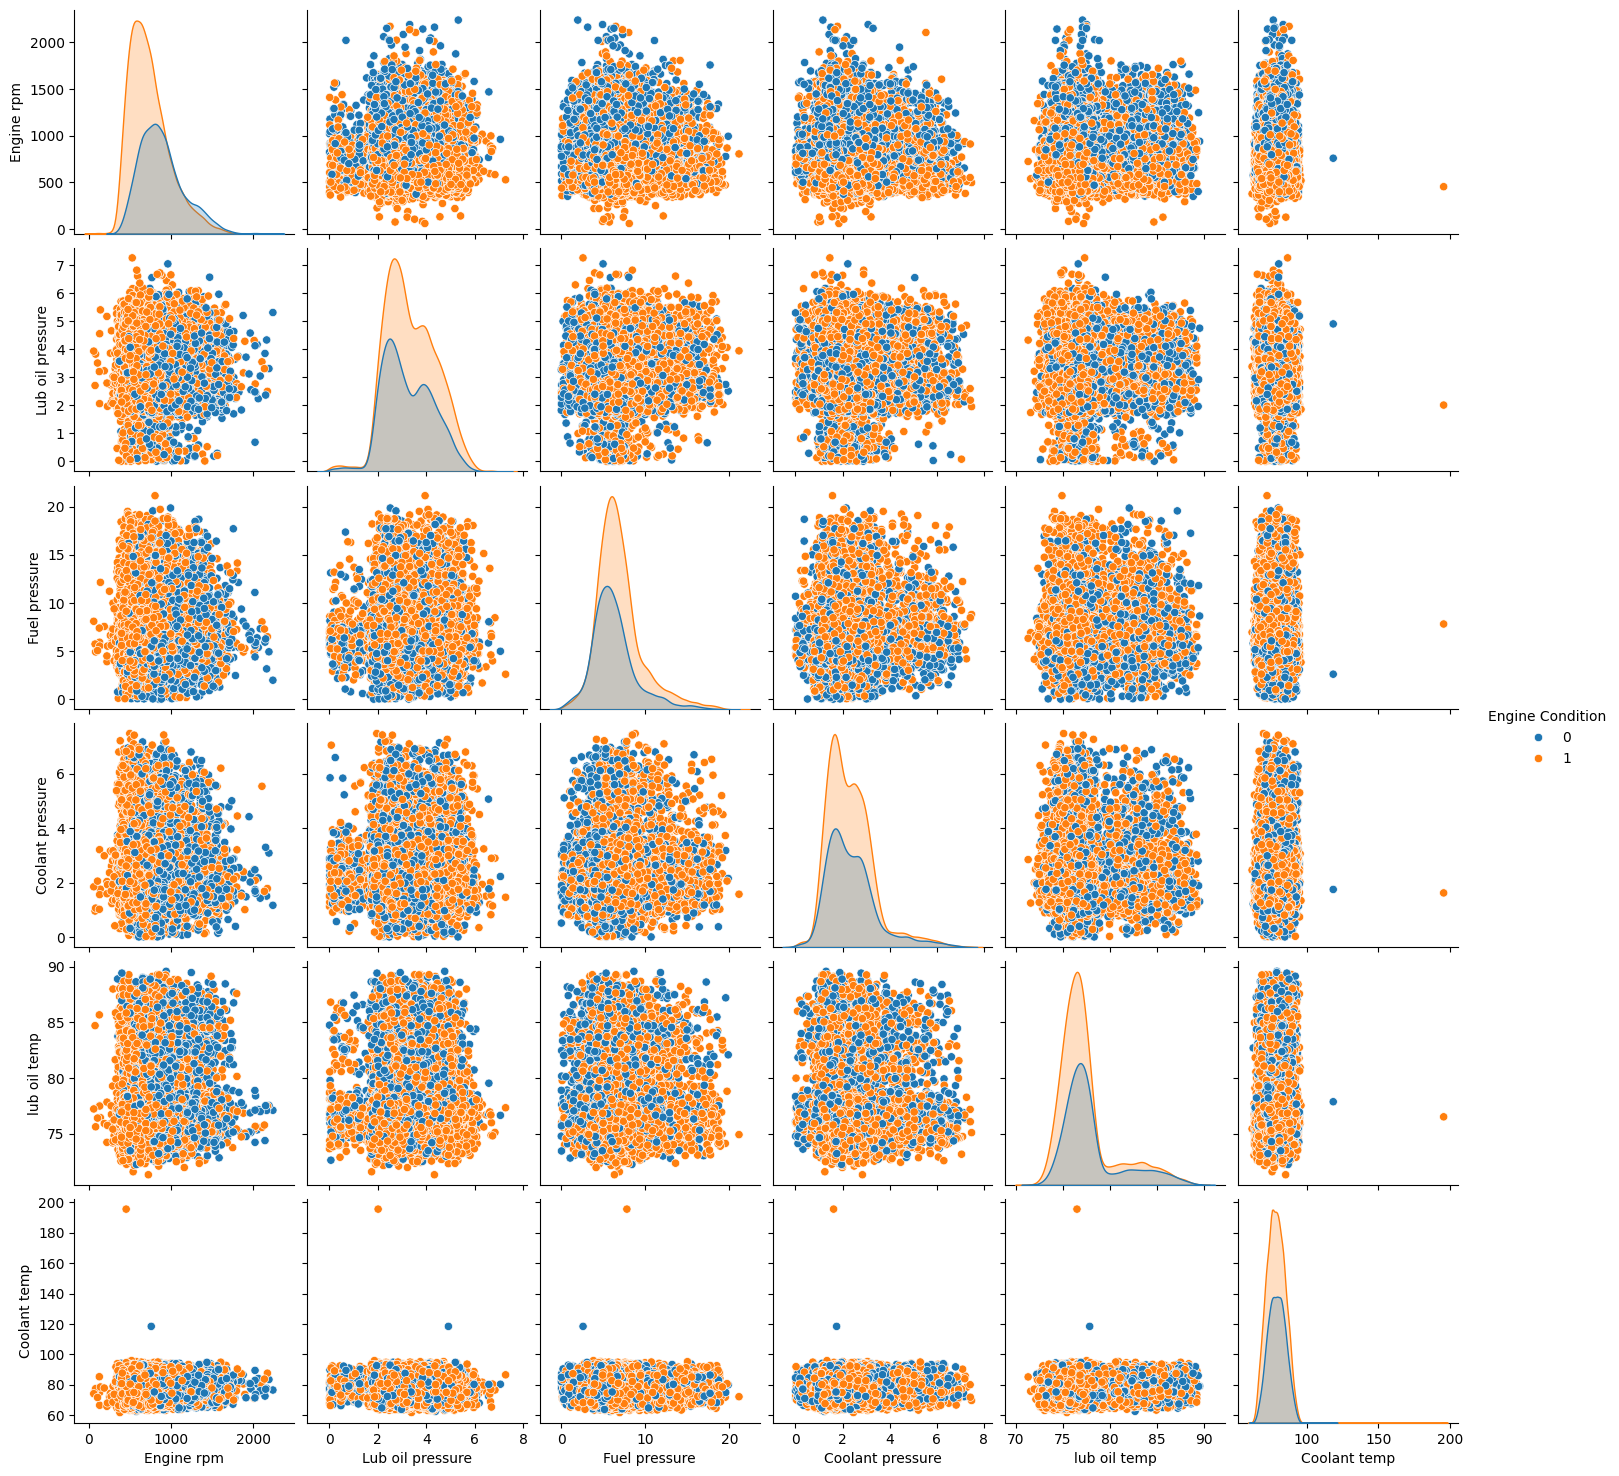

In [9]:
sns.pairplot(engine_df, hue="Engine Condition") #This plot shows how different measurements of an engine relate to each other and to the engine condition (0 or 1)

In [10]:
corr_matrix = engine_df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition    1.000000
Fuel pressure       0.116259
Lub oil pressure    0.060904
Coolant pressure   -0.024054
Coolant temp       -0.046326
lub oil temp       -0.093635
Engine rpm         -0.268201
Name: Engine Condition, dtype: float64

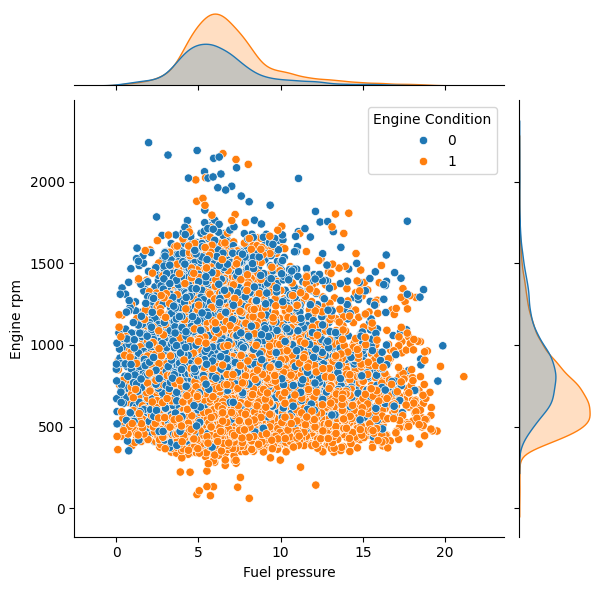

In [11]:
sns.jointplot(engine_df, x="Fuel pressure", y="Engine rpm", hue="Engine Condition")

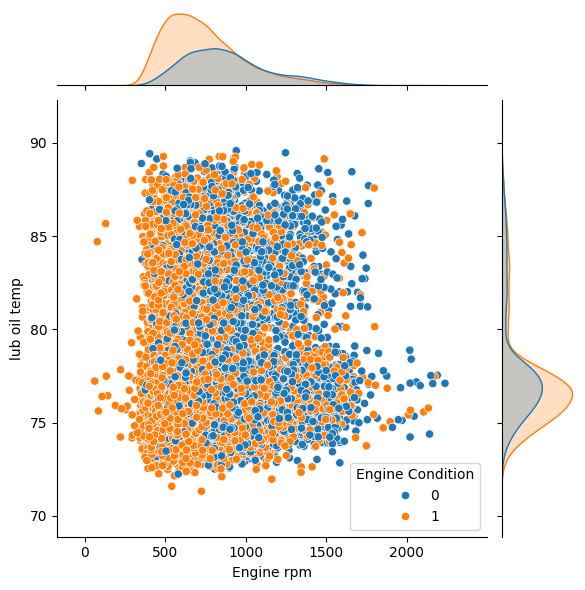

In [12]:
sns.jointplot(engine_df, x="Engine rpm", y="lub oil temp", hue="Engine Condition")

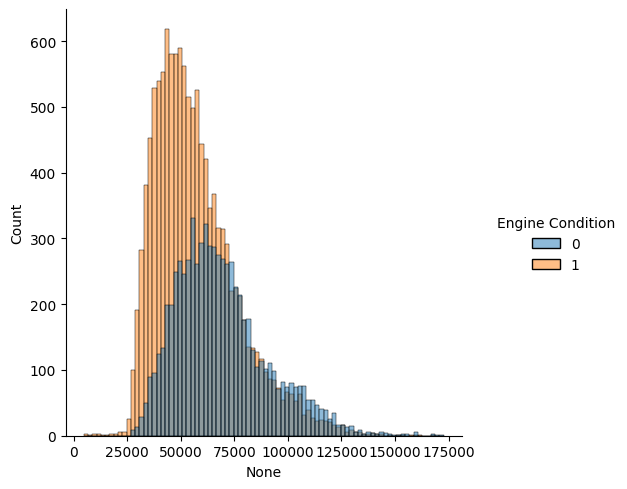

In [13]:
sns.displot(engine_df, x=engine_df["Engine rpm"] * engine_df["lub oil temp"], hue="Engine Condition")

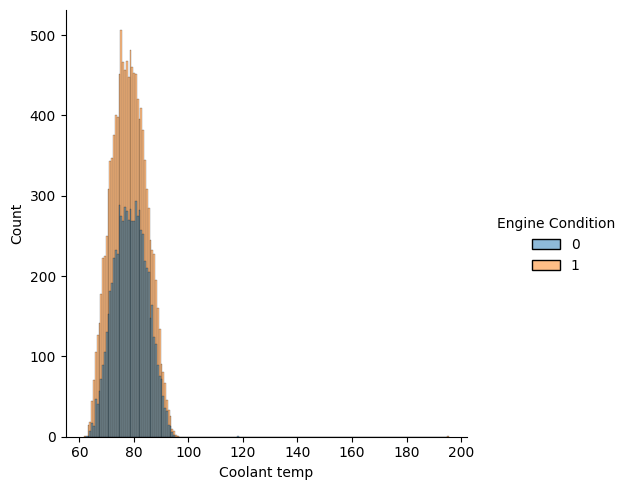

In [14]:
sns.displot(engine_df, x="Coolant temp", hue="Engine Condition")

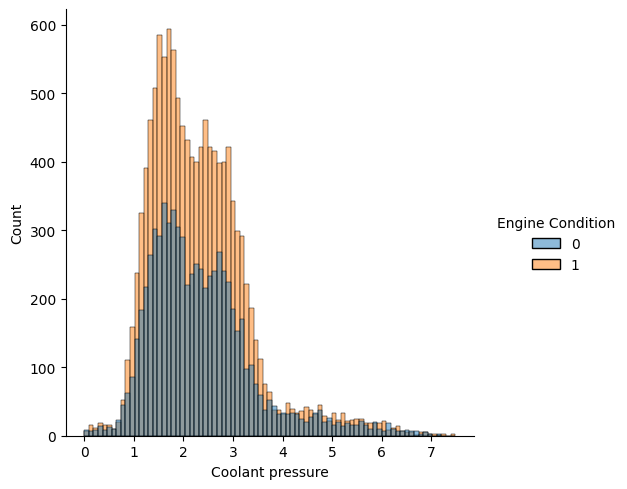

In [15]:
sns.displot(engine_df, x="Coolant pressure", hue="Engine Condition")

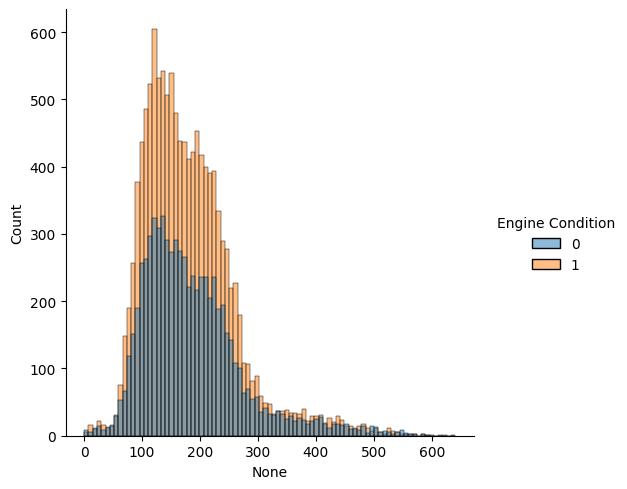

In [16]:
sns.displot(engine_df, x=engine_df["Coolant pressure"] * engine_df["Coolant temp"], hue="Engine Condition")

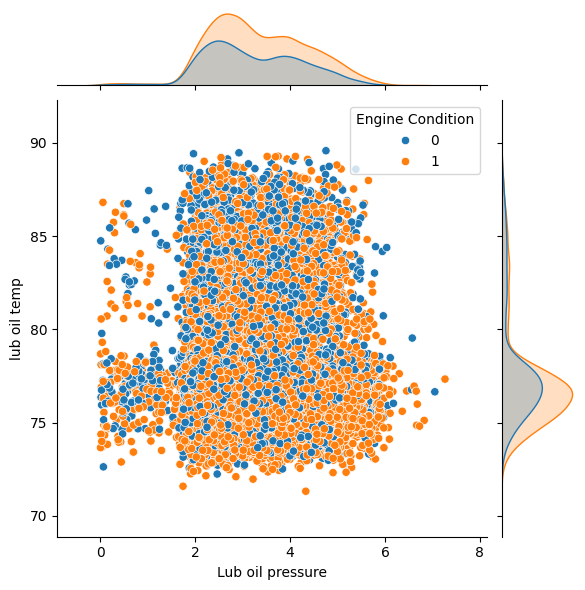

In [17]:
sns.jointplot(engine_df, x="Lub oil pressure", y="lub oil temp", hue="Engine Condition")

In [18]:
#coolant efficiency
engine_df["Coolant Efficiency"]=(1/engine_df["Engine rpm"])* engine_df["Coolant temp"]
#oiling efficiency
engine_df["Oiling Efficiency"]=1/(engine_df["Engine rpm"]*engine_df["lub oil temp"])

In [19]:
engine_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,Coolant Efficiency,Oiling Efficiency
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,0.116617,0.000017
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,0.094116,0.000015
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,0.153165,0.000025
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,0.151743,0.000029
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,0.140550,0.000021


In [20]:
corr_matrix=engine_df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition      1.000000
Oiling Efficiency     0.274301
Coolant Efficiency    0.252389
Fuel pressure         0.116259
Lub oil pressure      0.060904
Coolant pressure     -0.024054
Coolant temp         -0.046326
lub oil temp         -0.093635
Engine rpm           -0.268201
Name: Engine Condition, dtype: float64

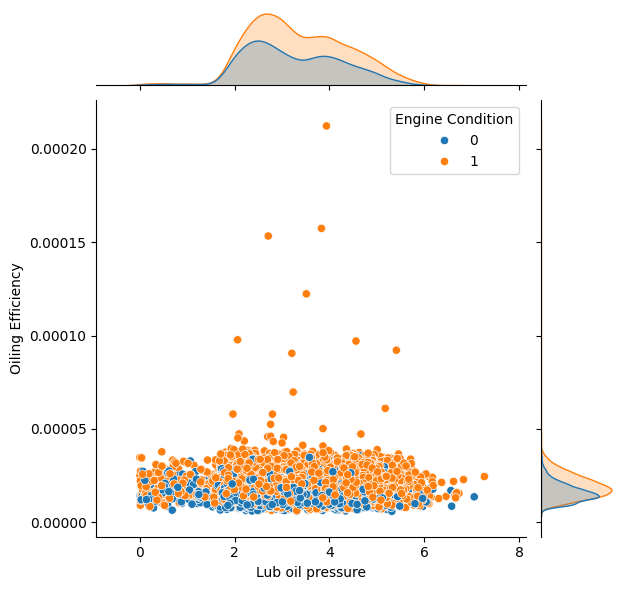

In [21]:
sns.jointplot(engine_df, x="Lub oil pressure", y="Oiling Efficiency", hue="Engine Condition")

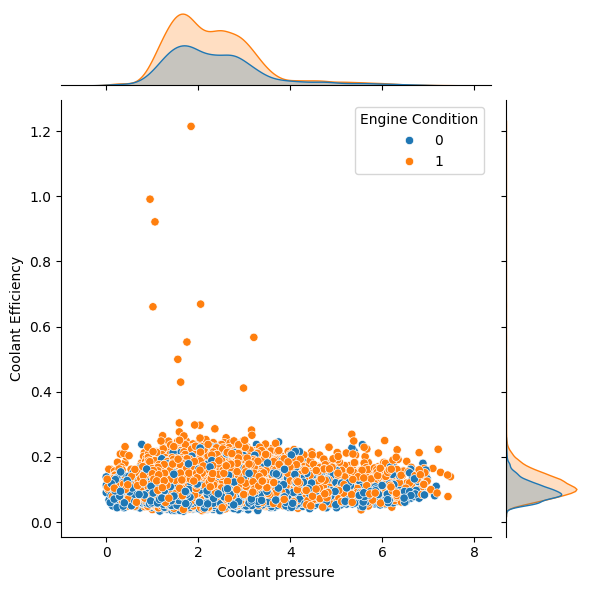

In [22]:
sns.jointplot(engine_df, x="Coolant pressure",y="Coolant Efficiency", hue="Engine Condition")

In [23]:
rpm_idx, oil_pressure_idx, fuel_pressure_idx, coolant_pressure_idx, oil_temp_idx, coolant_temp_idx = 0, 1, 2, 3, 4, 5

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_oil_system=True, add_coolant_system=True):
        self.add_oil_system = add_oil_system
        self.add_coolant_system = add_coolant_system

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.add_oil_system:
            oil_efficiency = 1 / (X[:, rpm_idx] * X[:, oil_temp_idx])
            X = np.c_[X, oil_efficiency]
          
        if self.add_coolant_system:
            cool_efficiency = (1 / X[:, rpm_idx]) * X[:, coolant_temp_idx]
            X = np.c_[X, cool_efficiency]
            
        return X

In [24]:
engine_features.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700,2.493592,11.790927,3.178981,84.144163,81.632187
1,876,2.941606,16.193866,2.464504,77.640934,82.445724
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
3,473,3.707835,19.510172,3.727455,74.129907,71.774629
4,619,5.672919,15.738871,2.052251,78.396989,87.000225


In [25]:
attr_addr = AttributesAdder()
engine_prep = attr_addr.transform(engine_features.values)
print(f"Transformed Data: {engine_prep[0, :]}")

Transformed Data: [7.00000000e+02 2.49359182e+00 1.17909274e+01 3.17898079e+00
 8.41441629e+01 8.16321865e+01 1.69776652e-05 1.16617409e-01]


In [26]:
engine_prep_pipe= Pipeline([
    ("attr_adder", AttributesAdder()),
    ("std_scaler", StandardScaler())
])
engine_data_prepared = engine_prep_pipe.fit_transform(engine_features.values)
engine_data_prepared[0, :]

array([-0.34094836, -0.7930403 ,  1.85998007,  0.81401782,  2.08966341,
        0.51634686, -0.18711723,  0.15814015])

In [27]:
engine_data_prepared.shape

(19535, 8)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(engine_data_prepared, engine_labels, test_size=0.1, random_state=17)
print(f"Shape X Train: {X_train.shape}")
print(f"Shape y Train: {y_train.shape}\n")
print(f"Shape X Test: {X_test.shape}")
print(f"Shape y Test: {y_test.shape}\n")

Shape X Train: (17581, 8)
Shape y Train: (17581,)

Shape X Test: (1954, 8)
Shape y Test: (1954,)



In [29]:
## Initilisation
log_reg = LogisticRegression()
#
## Training
log_reg.fit(X_train, y_train)
#
validation = log_reg.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")

Score: 0.6811668372569089


In [30]:
# Initilisation
tree_cls = DecisionTreeClassifier()

# Training
tree_cls.fit(X_train, y_train)

validation = tree_cls.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")


Score: 0.579324462640737


In [31]:
# Initilisation
forest_cls = RandomForestClassifier()

# Training
forest_cls.fit(X_train, y_train)

validation = forest_cls.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")

Score: 0.6606960081883316


In [32]:
def predict_engine_health(rpm, oil_pressure, fuel_pressure, coolant_pressure, oil_temp, coolant_temp):
    user_input = np.array([[rpm, oil_pressure, fuel_pressure, coolant_pressure, oil_temp, coolant_temp]])
    user_input_prepared = engine_prep_pipe.transform(user_input)
    prediction = log_reg.predict(user_input_prepared)
    return "Healthy" if prediction[0] == 1 else "Unhealthy"


In [33]:
unhealthy_rpm = 9000  # Over-revving engine
unhealthy_oil_pressure = 5  # Low oil pressure indicating potential oil pump failure
unhealthy_fuel_pressure = 20  # Low fuel pressure indicating potential fuel pump issues
unhealthy_coolant_pressure = 30  # High coolant pressure indicating potential cooling system issues
unhealthy_oil_temp = 300  # Very high oil temperature indicating potential overheating
unhealthy_coolant_temp = 250  # Very high coolant temperature indicating potential overheating

prediction = predict_engine_health(unhealthy_rpm, unhealthy_oil_pressure, unhealthy_fuel_pressure, unhealthy_coolant_pressure, unhealthy_oil_temp, unhealthy_coolant_temp)
print(f"Predicted Engine Health: {prediction}")

Predicted Engine Health: Unhealthy


In [34]:
def get_user_input():
    try:
        rpm = float(input("Enter RPM: "))
        oil_pressure = float(input("Enter oil pressure: "))
        fuel_pressure = float(input("Enter fuel pressure: "))
        coolant_pressure = float(input("Enter coolant pressure: "))
        oil_temp = float(input("Enter oil temperature: "))
        coolant_temp = float(input("Enter coolant temperature: "))
        return rpm, oil_pressure, fuel_pressure, coolant_pressure, oil_temp, coolant_temp
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return get_user_input()

In [ ]:
user_rpm, user_oil_pressure, user_fuel_pressure, user_coolant_pressure, user_oil_temp, user_coolant_temp = get_user_input()
prediction = predict_engine_health(user_rpm, user_oil_pressure, user_fuel_pressure, user_coolant_pressure, user_oil_temp, user_coolant_temp)
print(f"Predicted Engine Health: {prediction}")